In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [11]:
#file_to_plot = '2023_02_09 21_37_45.pk'
file_to_plot = '2023_05_03 04_20_15.pk'
print(file_to_plot)
results = pickle.load(open('./cosmotrans_out/' + file_to_plot, 'rb'))
params = results[0]
thermal_params = results[1]

2023_05_03 04_20_15.pk


/tmp/ipykernel_35972/3209960010.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(20, 4))


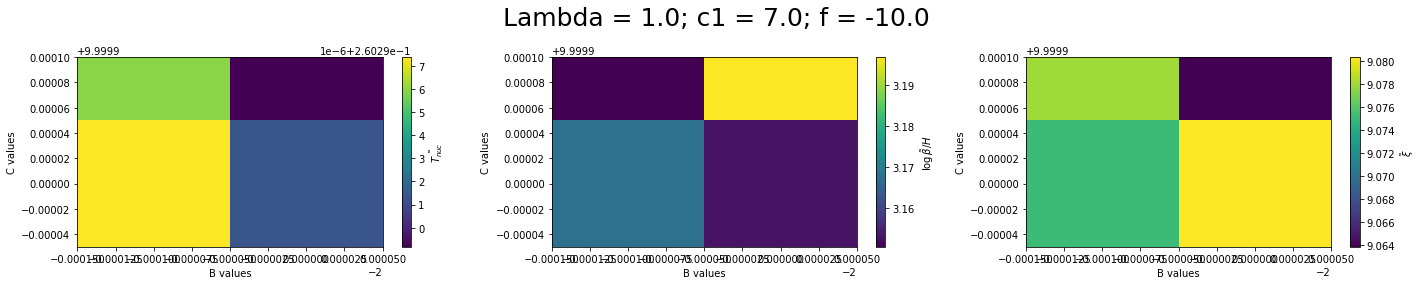

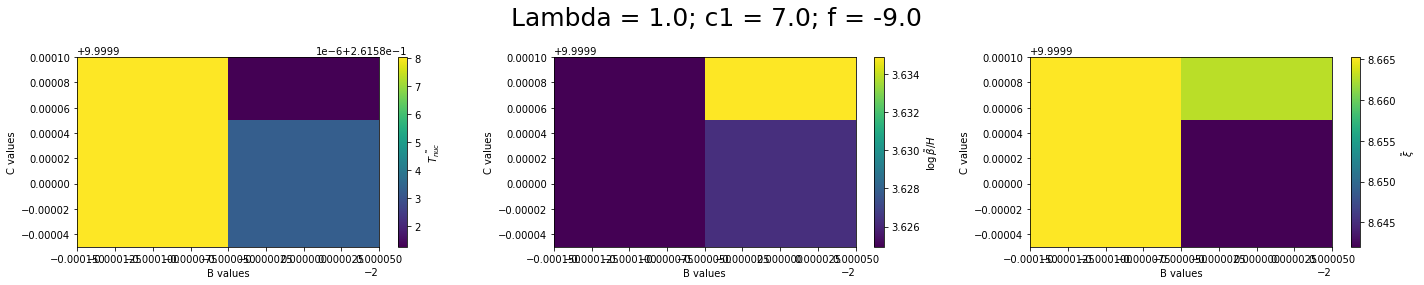

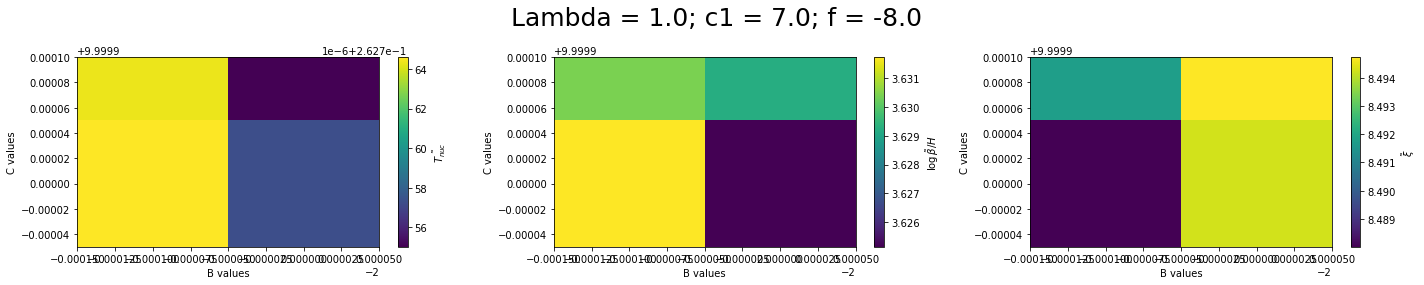

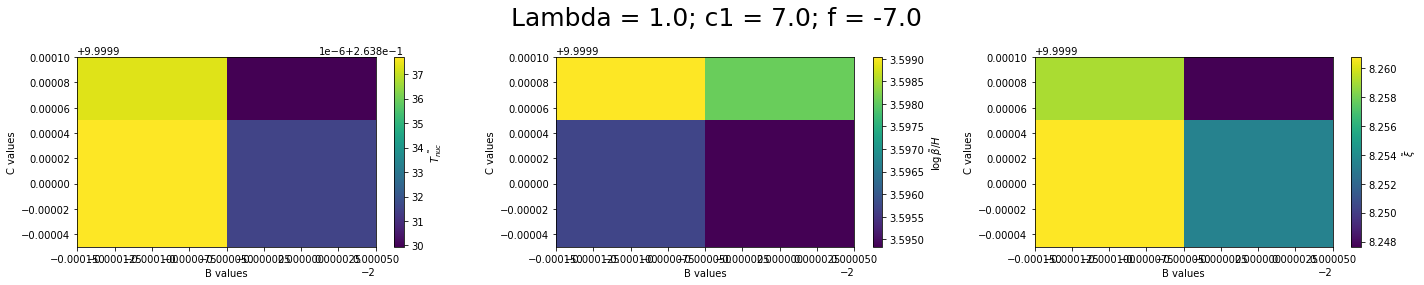

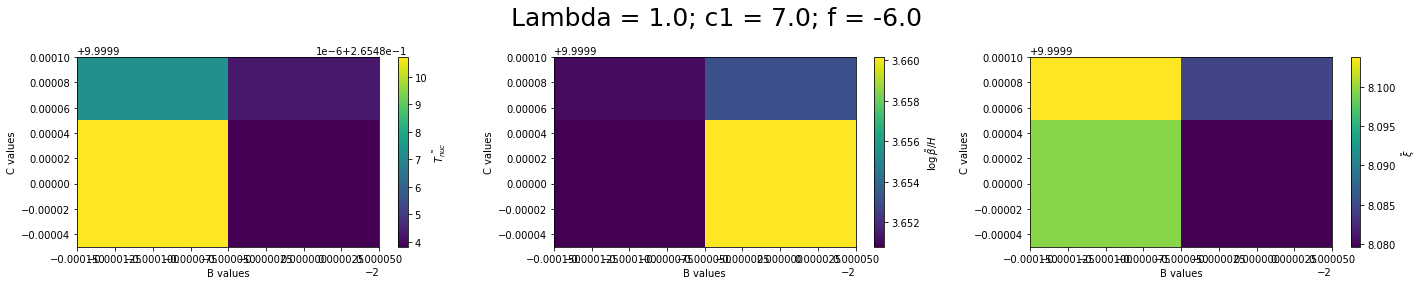

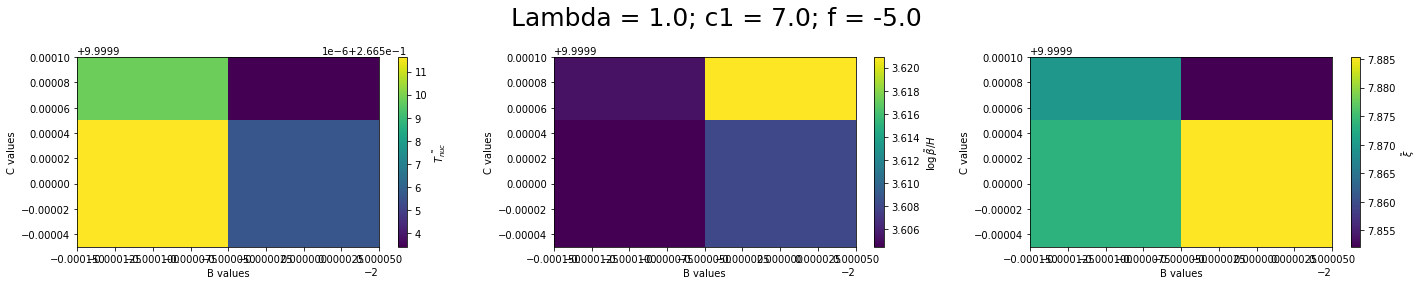

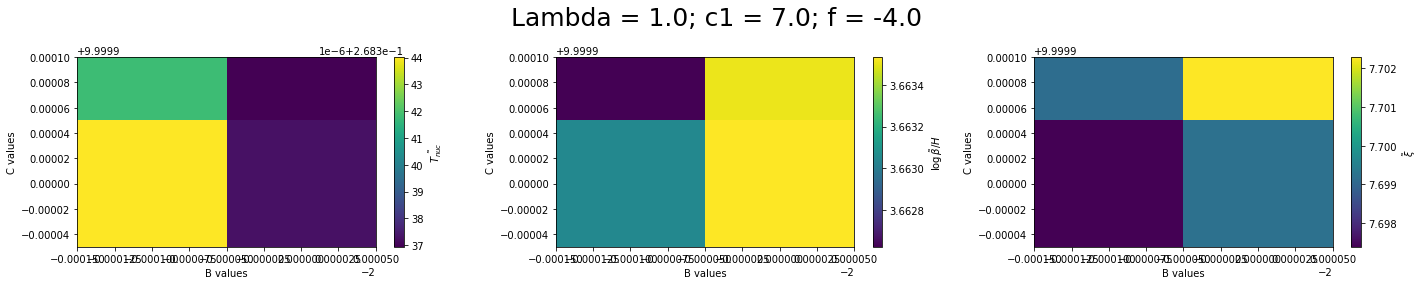

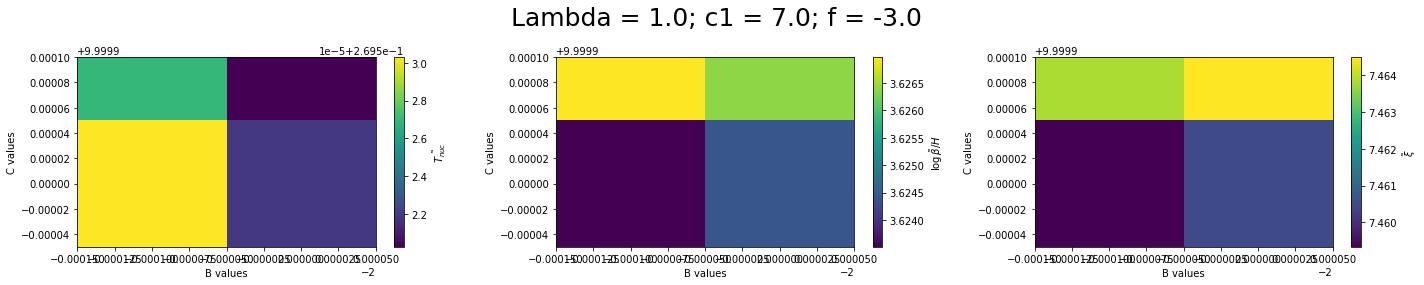

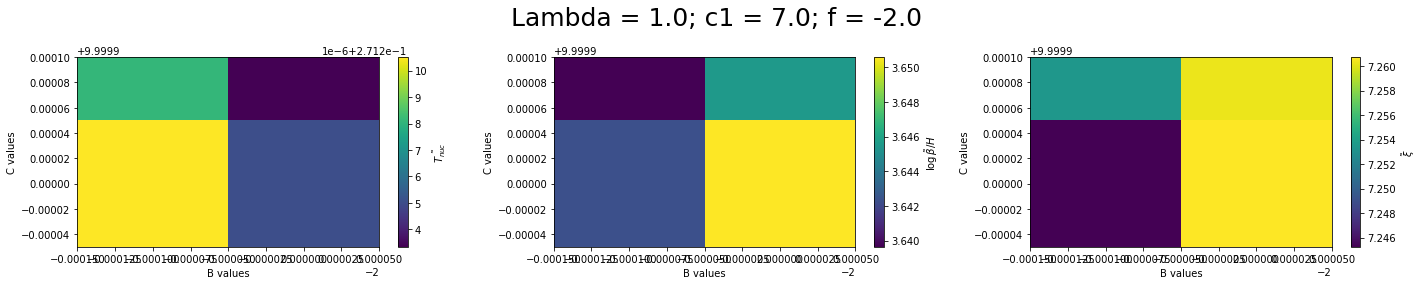

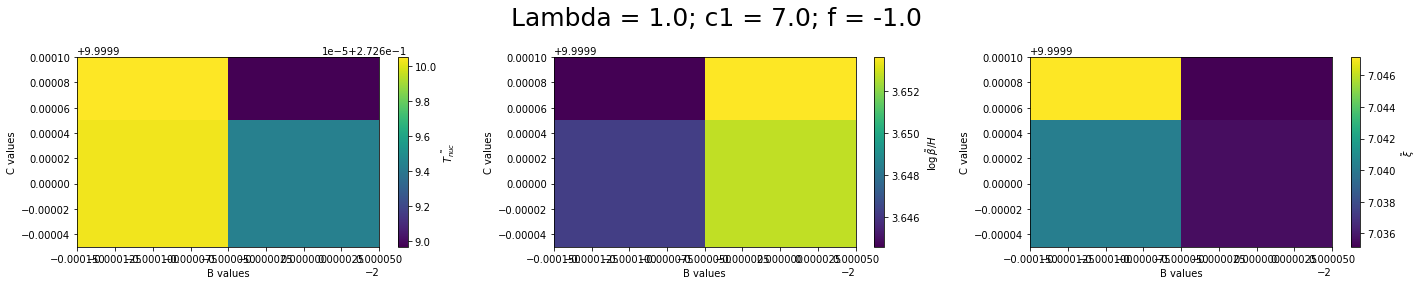

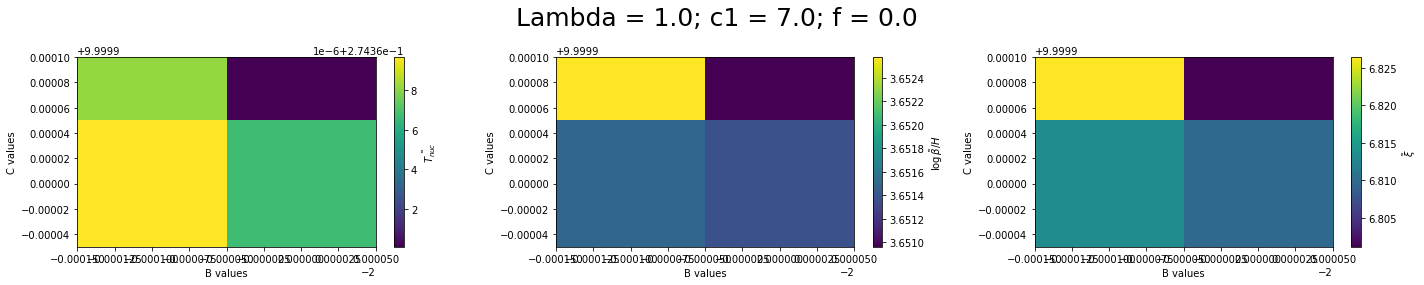

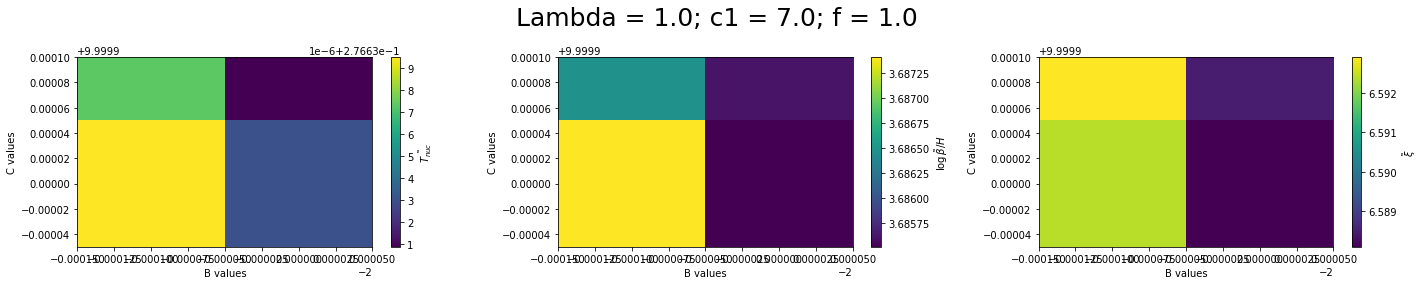

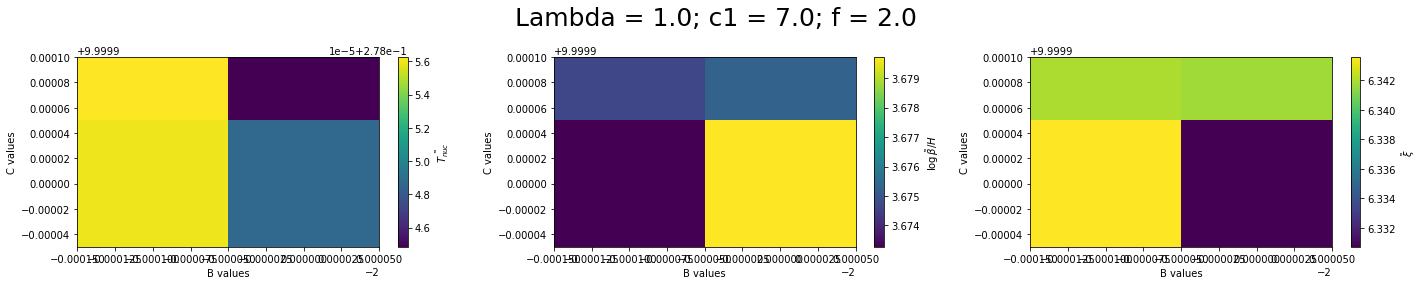

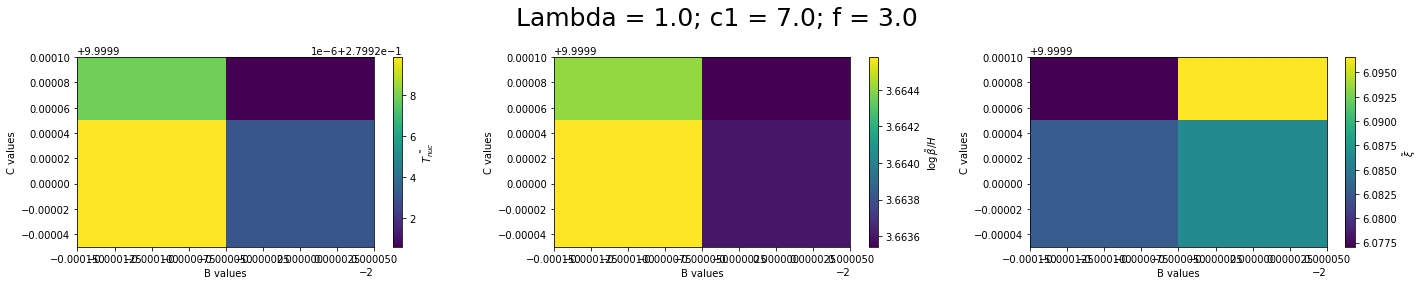

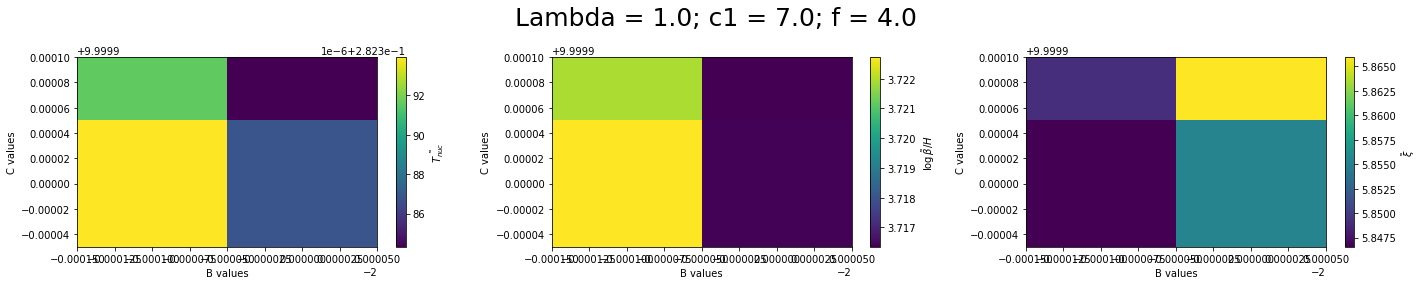

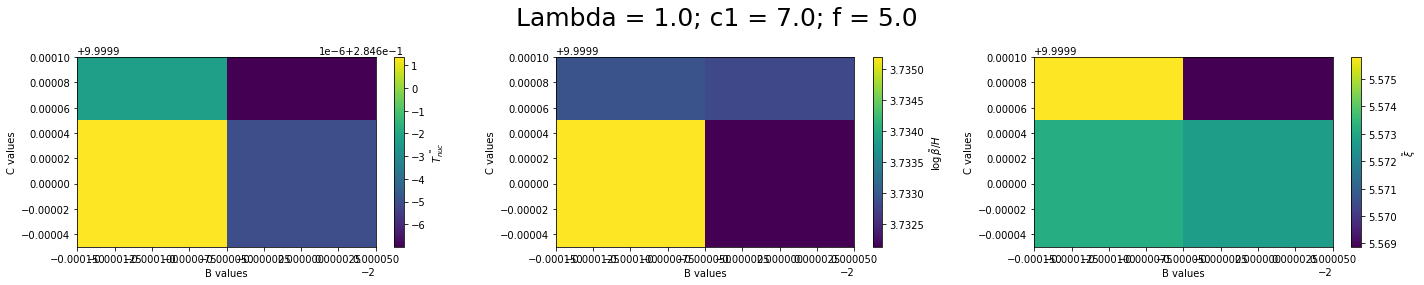

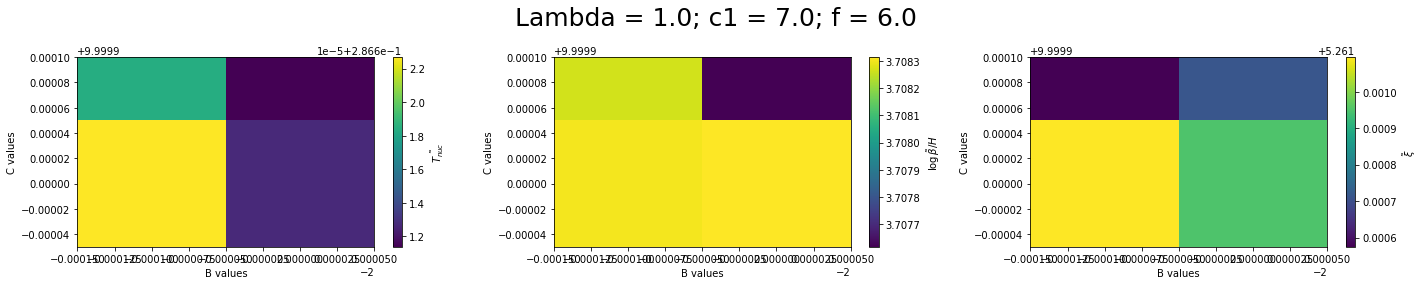

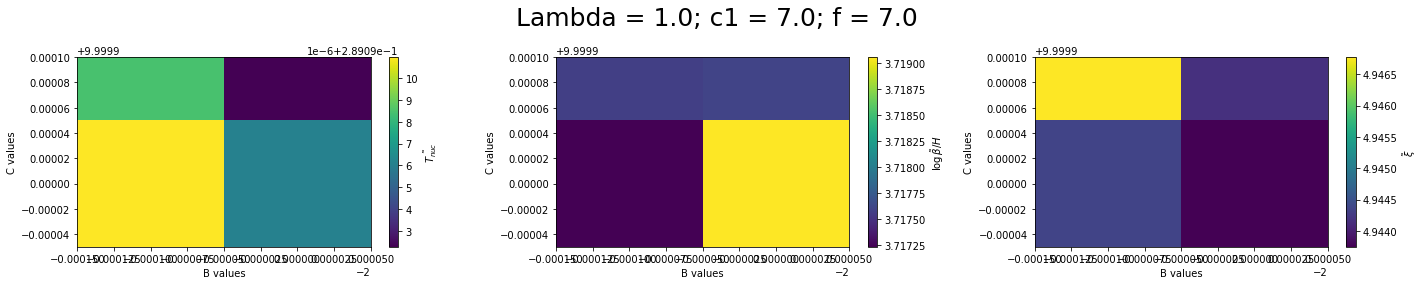

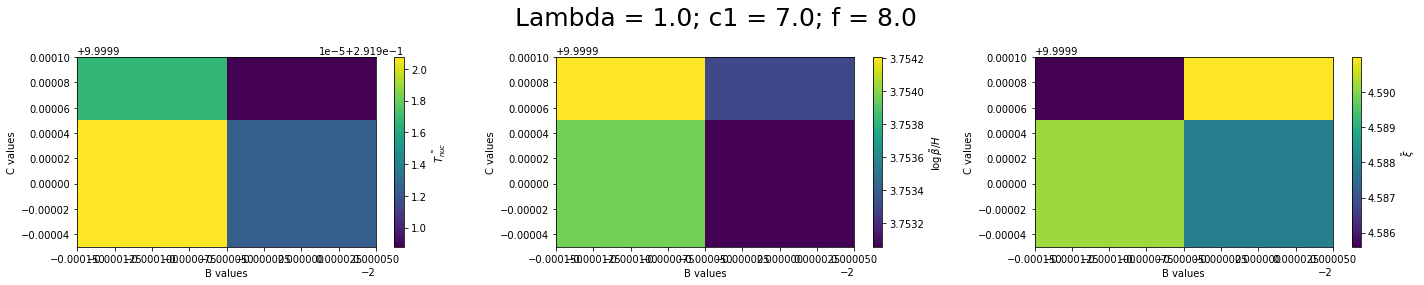

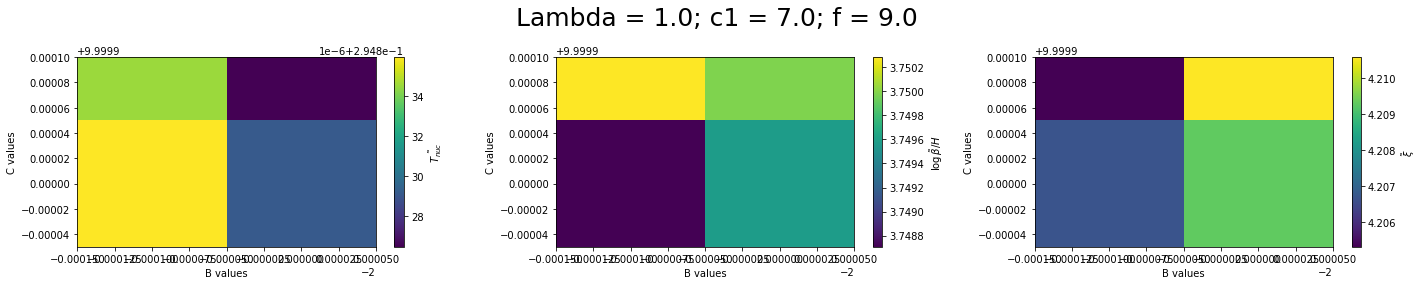

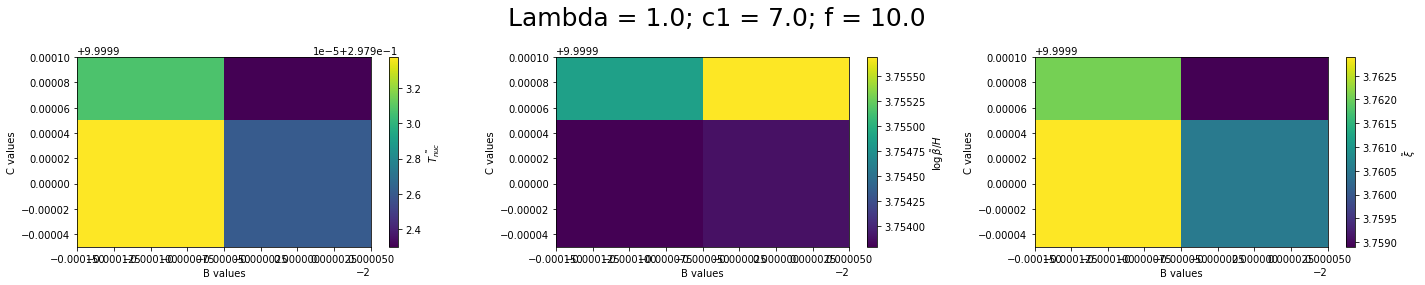

In [12]:
def plot_thermal_params(title, thermal_params):
    fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(20, 4))
    fig.suptitle(title, fontsize = 25)
    
    thermal_params['Tnucs'][thermal_params['Tnucs'] == 0] = np.nan
    pc = ax[0].pcolormesh(params['b'], params['c'], thermal_params['Tnucs'].T)
    ax[0].set_ylabel('C values')
    ax[0].set_ylim(top=params['c'][-1])
    ax[0].plot(params['b'], params['b']**2)
    ax[0].set_xlabel('B values')
    fig.colorbar(pc, label=r'$\tilde{T_{nuc}}$', ax=ax[0]);

    thermal_params['betaHs'][thermal_params['betaHs'] == 0] = np.nan
    pc = ax[1].pcolormesh(params['b'], params['c'], np.log10(thermal_params['betaHs']).T)
    ax[1].set_ylabel('C values')
    ax[1].set_ylim(top=params['c'][-1])
    ax[1].plot(params['b'], params['b']**2)
    ax[1].set_xlabel('B values')
    fig.colorbar(pc, label=r'$\log\tilde{\beta}/H$', ax=ax[1]);

    thermal_params['ksis'][thermal_params['ksis'] == 0 ] = np.nan
    pc = ax[2].pcolormesh(params['b'], params['c'], thermal_params['ksis'].T)
    ax[2].set_ylabel('C values')
    ax[2].set_ylim(top=params['c'][-1])
    ax[2].plot(params['b'], params['b']**2)
    ax[2].set_xlabel('B values')
    fig.colorbar(pc, label=r'$\tilde{\xi}$', ax=ax[2]);
    
    fig.tight_layout()
    
for Lami in range(np.size(thermal_params, axis=0)):
    for c1i in range(np.size(thermal_params, axis=1)):
        for fi in range(np.size(thermal_params, axis=2)):
            title = f"Lambda = {params['Lambda'][Lami]}; c1 = {params['c1'][c1i]}; f = {params['f'][fi]}"
            plot_thermal_params(title, thermal_params[Lami, c1i, fi])

[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.] [0.26028917393261486, 0.26158127613287907, 0.26275501370290977, 0.2638299442725509, 0.2654842506595858, 0.266503407108649, 0.26833693554256155, 0.2695202649938436, 0.2712033415963394, 0.2726896615307108, 0.2743600849216966, 0.27663087698535604, 0.2780448403214323, 0.2799206007618827, 0.2823843165126207, 0.2845930046401798, 0.2866113833723466, 0.289092272237978, 0.2919087852675019, 0.29482647661102884, 0.29792301958788175] [3.19685411022846, 3.6348639694898774, 3.629239498213116, 3.5980774211153226, 3.6530690633017637, 3.6209041349095346, 3.6635043093242863, 3.626379040134158, 3.645530506379281, 3.653619693088992, 3.6509621438582887, 3.6856193881450925, 3.675279547824679, 3.663542514399396, 3.7163510601529413, 3.7328038846354805, 3.7076171952732797, 3.7176028950145987, 3.7533023662154417, 3.7499783129187207, 3.7556870318293956] [9.063813734185738, 8.662860248268824, 8.494725628479

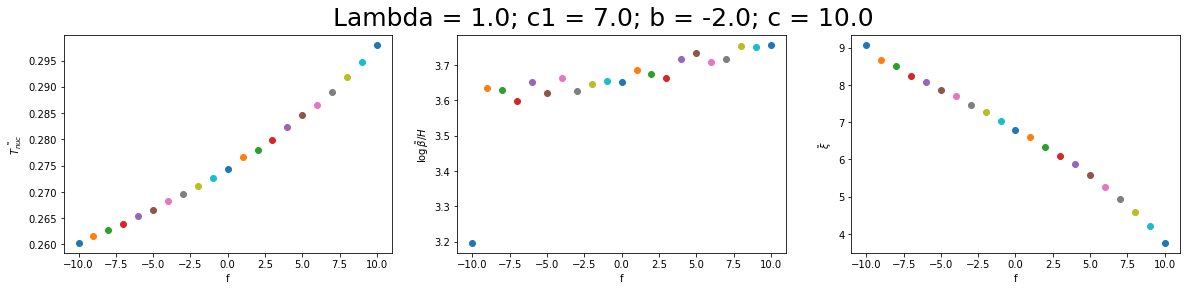

In [13]:
domain = 'f'
const_params = ['Lambda', 'c1']
plot_Tnucs = []
plot_logbetaHs = []
plot_ksis = []

for p1i in range(np.size(params[const_params[0]])):
    for p2i in range(np.size(params[const_params[1]])):
        bi = int(np.floor(params['b'].size/2))
        ci = int(np.floor(params['c'].size/2))
        title = f"{const_params[0]} = {params[const_params[0]][p1i]}; {const_params[1]} = {params[const_params[1]][p2i]}; b = {params['b'][bi]}; c = {params['c'][ci]}"
        fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(20, 4))
        fig.suptitle(title, fontsize = 25)
        ax[0].set_ylabel(r'$\tilde{T_{nuc}}$')
        ax[0].set_xlabel(domain)
        ax[1].set_ylabel(r'$\log\tilde{\beta}/H$')
        ax[1].set_xlabel(domain)
        ax[2].set_ylabel(r'$\tilde{\xi}$')
        ax[2].set_xlabel(domain)
        for di in range(np.size(params[domain])):
            thermal_params[p1i, p2i, di]['Tnucs'][thermal_params[p1i, p2i, di]['Tnucs'] == 0] = np.nan
            thermal_params[p1i, p2i, di]['ksis'][thermal_params[p1i, p2i, di]['ksis'] == 0 ] = np.nan
            plot_Tnucs.append(thermal_params[p1i, p2i, di]['Tnucs'][bi, ci])
            plot_logbetaHs.append(np.log10(thermal_params[p1i, p2i, di]['betaHs'][bi, ci]))
            plot_ksis.append(thermal_params[p1i, p2i, di]['ksis'][bi, ci])
            ax[0].scatter(params[domain][di], thermal_params[p1i, p2i, di]['Tnucs'][bi, ci])
            ax[1].scatter(params[domain][di], np.log10(thermal_params[p1i, p2i, di]['betaHs'][bi, ci]))
            ax[2].scatter(params[domain][di], thermal_params[p1i, p2i, di]['ksis'][bi, ci])

print(params[domain], plot_Tnucs, plot_logbetaHs, plot_ksis)